# Lesson 21: Introduction to Matplotlib: plotting a histogram

(c) 2016 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l21_intro_to_matplotlib.ipynb).*

In [30]:
# NumPy, of course
import numpy as np

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# We will use Seaborn styling to make plots look nicer Commented out
# here for demonstration later in this lesson
# import seaborn as sns

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# In our IPython terminal do:
# %matplotlib

We had a nice data set in the last tutorial, the cross-sectional areas of eggs from different mothers with different feeding conditions.  While it is instructive to look at values, such as medians, etc., computed from NumPy arrays with the data, we would of course like to plot the results.  The [Matplotlib package](http://matplotlib.org) is the central plotting software in the SciPy stack.  In this lesson, we will explore its capabilities and API.  [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html) is another great package that allows for nice formatting of Matplotlib plots, that you should have installed in [Lesson 0](l00_configuring_your_computer.html).

A couple comments:

1. Matplotlib will soon have its 2.0 release. This will feature many improvements, and default graphs will look much nicer.  It will also have many of the stylings of Seaborn available.
2. There are many other great plotting tools.  In particular, [Bokeh](http://bokeh.pydata.org/) makes beautiful, interactive, browser-based plots. It is my plotting software of choice.

Ok, let's start using Matplotlib!

## Importing Matplotlib

Most of the plotting you will do, and all of the plotting we do in bootcamp, will use Matplotlib's `pyplot` module.  Like NumPy, this module is pervasive, and the custom is to import it like this:

    import matplotlib.pyplot as plt
    
This is what we did at the beginning of this lesson.  For some special types of plotting, you will need to import other Matplotlib modules, but we will not do that in the bootcamp.

We will also be making heavy use of Seaborn, always for styling. Seaborn is customarily imported as `sns`, or

    import seaborn as sns

We will import it later in this tutorial to compare plot styling with and without Seaborn's defaults.

## First example: making a histogram

Let's load in our egg cross-sectional area data again.

In [2]:
# Load in data
xa_high = np.loadtxt('data/xa_high_food.csv', comments='#')
xa_low = np.loadtxt('data/xa_low_food.csv', comments='#')

For our first plot, we'll make a histogram using Matplotlib.

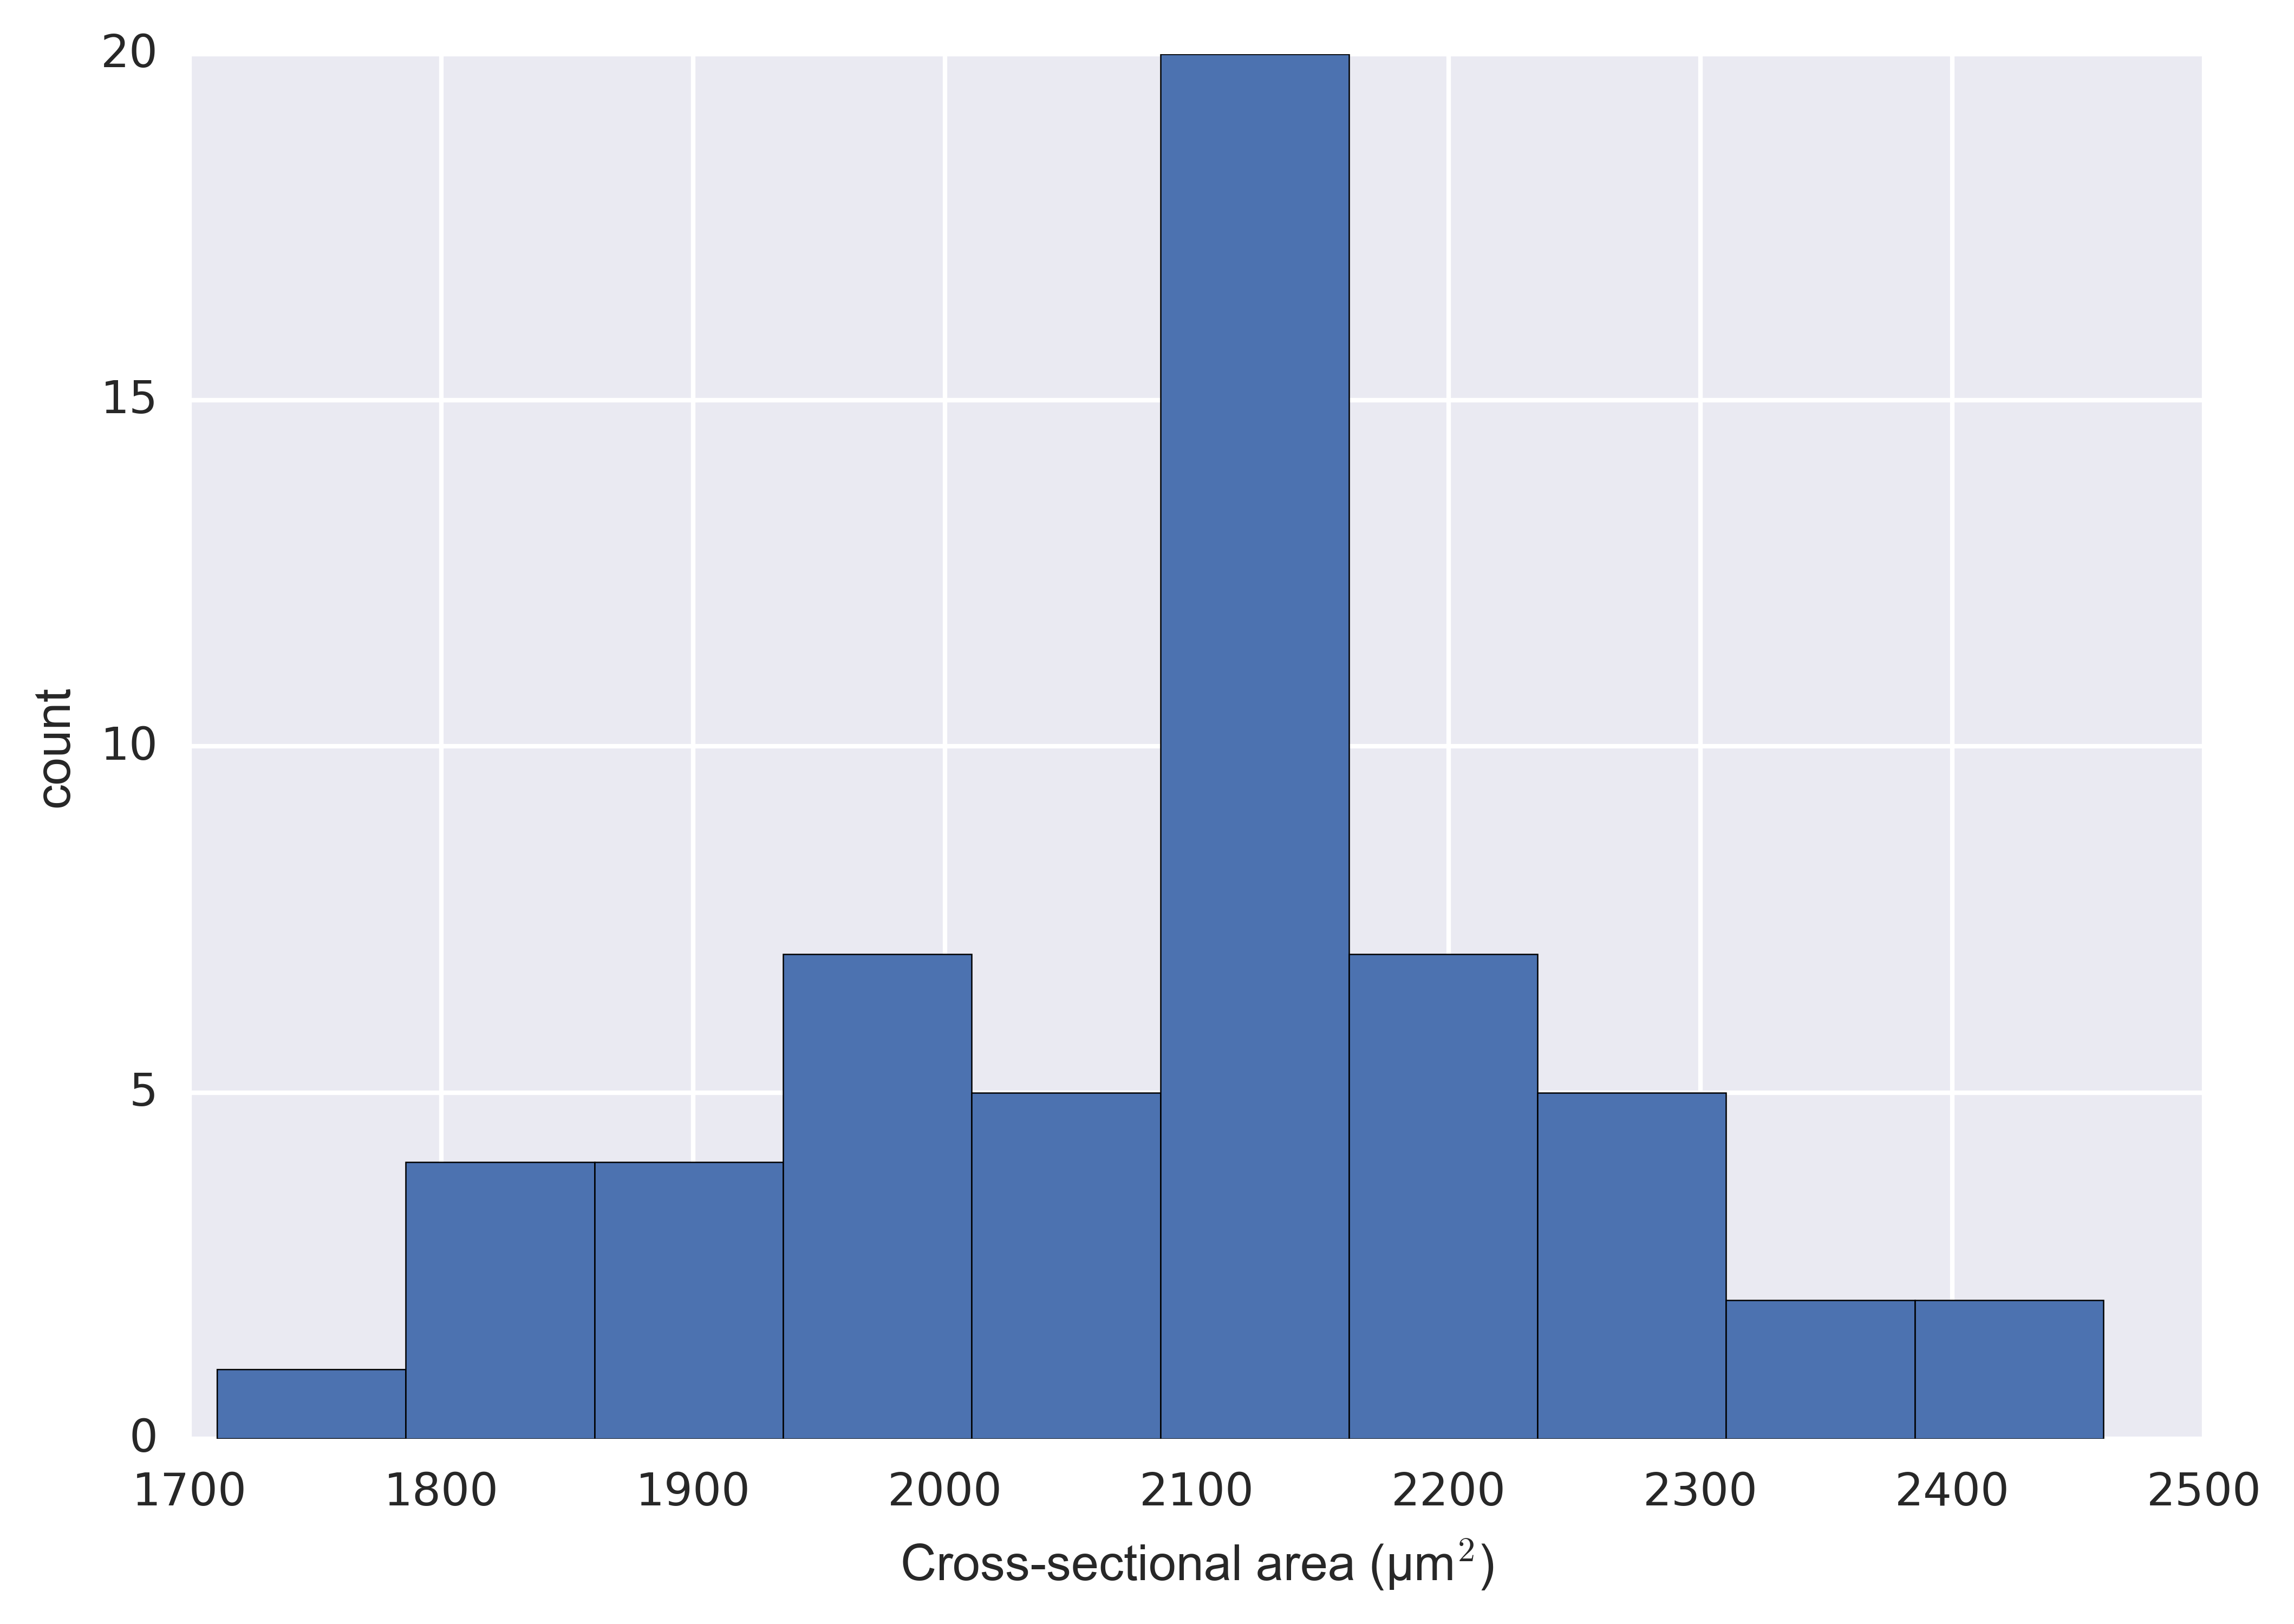

In [12]:
# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('count')

# You need this is you didn't use %matplotlib in IPython shell
# plt.show()

Before we go through the plotting commands, I want to focus on how we get the plot to show. If you are working interactively in an IPython shell, which you often are for plotting, since you are exploring data, you definitely want to make the plotting windows interactive. In yout IPython shell, do this:

    %matplotlib
    
This magic functions lets you have multiple plots open at once and also allows you to continue using IPython while a plot is being displayed. If you do not do this option, you need the last line, `plt.show()`. This tells Matplotlib to render the plot you made in an interactive window. The window will stay open, and your IPython session frozen.

Now, let's go through the plotting line-by-line.  The first line makes the histogram.

    _ = plt.hist(xa_low)
    
We put the "underscore equals" in front of the function call because `plt.hist()` returns a tuple of NumPy arrays containing the bins and counts for the histogram.  Because it is of no use to us, we just assign it the dummy variable `_`.  The  argument is the data set we want to compute and plot a histogram for.

In the next line, we label the $x$-axis.

    plt.xlabel('Cross-sectional area (µm$^2$)')
    
The dollar signs around the `^2` tell Matplotlib that we invoke $\LaTeX$ to render the string.  $\LaTeX$ is a type-setting program that is very useful for displaying mathematical equations.

Finally, the last line adds the $y$-axis label.

### Tweaking the defaults

I would argue that the bars should lie at tick marks to make things more clear.  I.e., we should bin the data to be between 1700 and 1750, 1750 and 1800, and so on.  We can specify the bins we want in our call to `plt.hist()`.  The `np.arange()` function helps with this.

In [6]:
# Make bin boundaries
bins = np.arange(1700, 2501, 50)

`np.arange(start, stop, stride)` generates evenly spaced points going from `start` to `stop` (exclusively, just like indexing) with a stride of `stride`.  We can then use these bin boundaries with the `bins` kwarg.  If `stride` is not given, the default is `stride = 1`.  If only one argument is given, `start` is assumed to be zero and `stride` is assumed to be `1`.

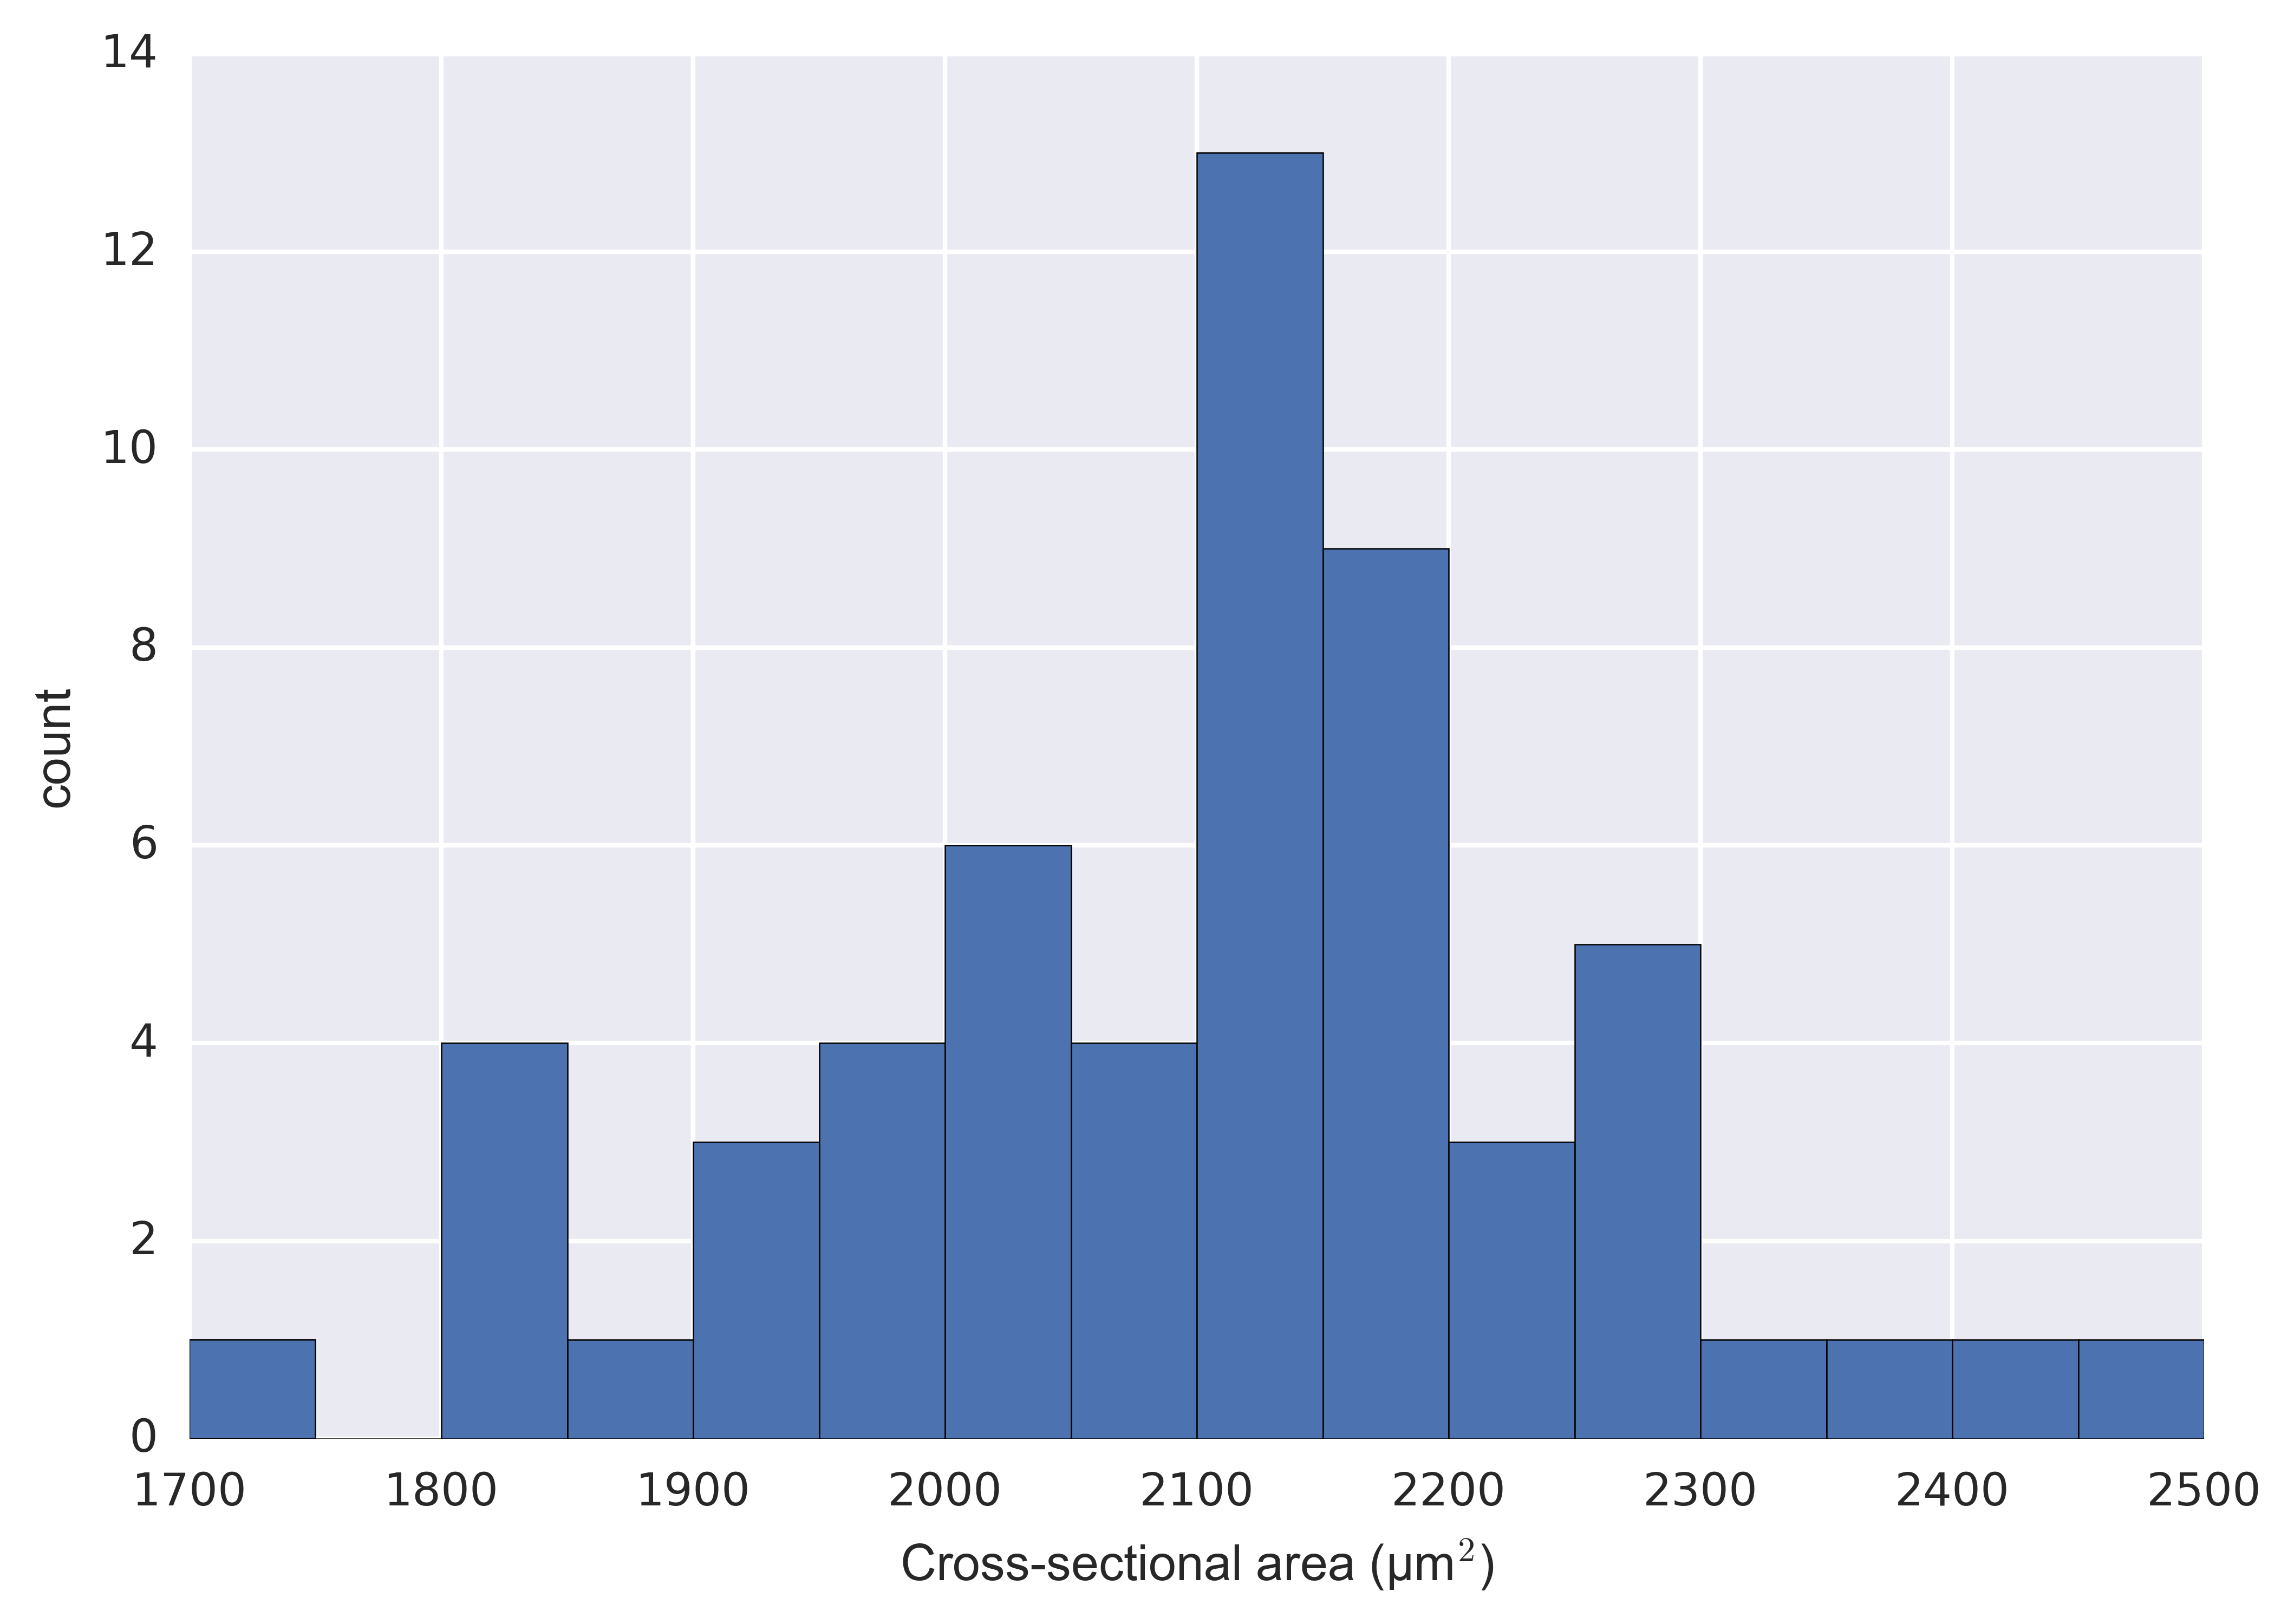

In [13]:
# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, bins=bins)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('count')

### Using Seaborn to make it look pretty

I would argue that the plot is ugly.  The strong blue color is offensive.  Inward ticks are in general a very bad idea.  (Note, these defaults will be fixed in Matplotlib 2.0, and everything will look nicer.)  Seaborn is a useful package for making plots look pretty (and also for doing some nice statistical plots).  To invoke Seaborn, we need to import it.  We can then set the properties of the plots using `sns.set()`. Henceforth, we will do these things at the beginning of our lessons.

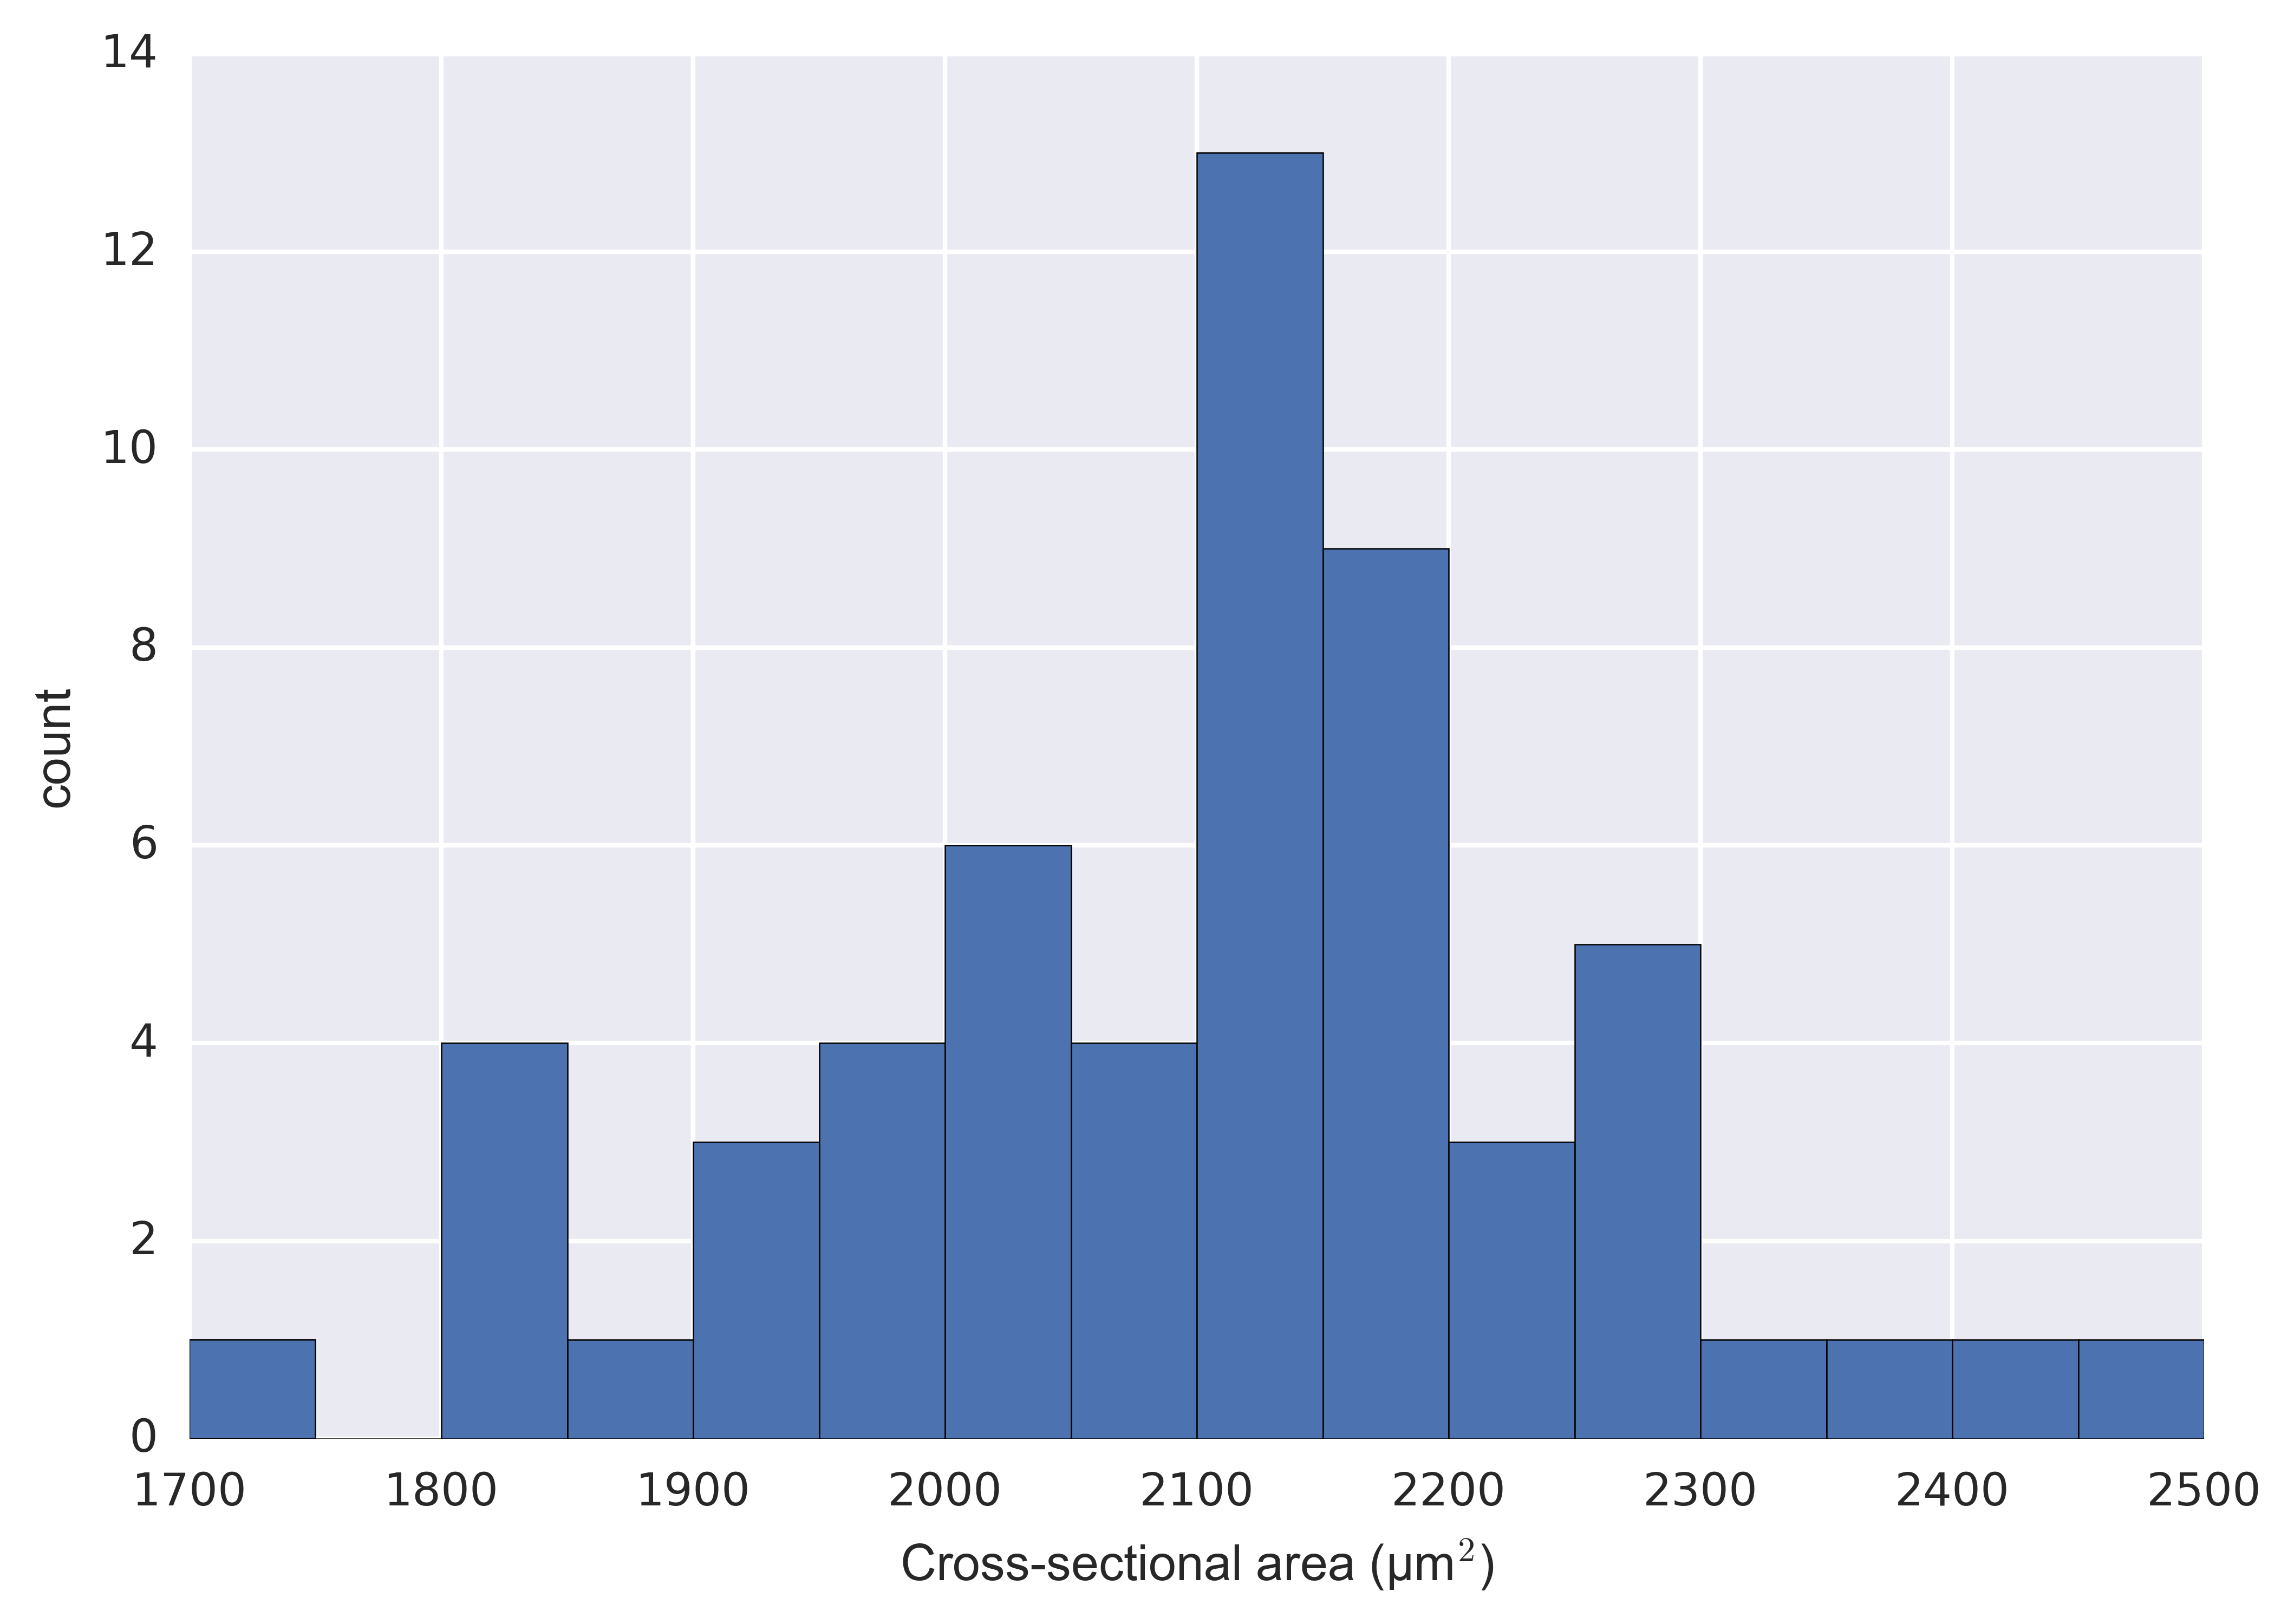

In [14]:
import seaborn as sns
sns.set()

# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, bins=bins)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('count')

Much nicer!  I actually think the axis labels are a big small, especially if they are going to be used in a talk, so I like to set them larger.  We can do this with kwargs in the `plt.xlabel()` call.

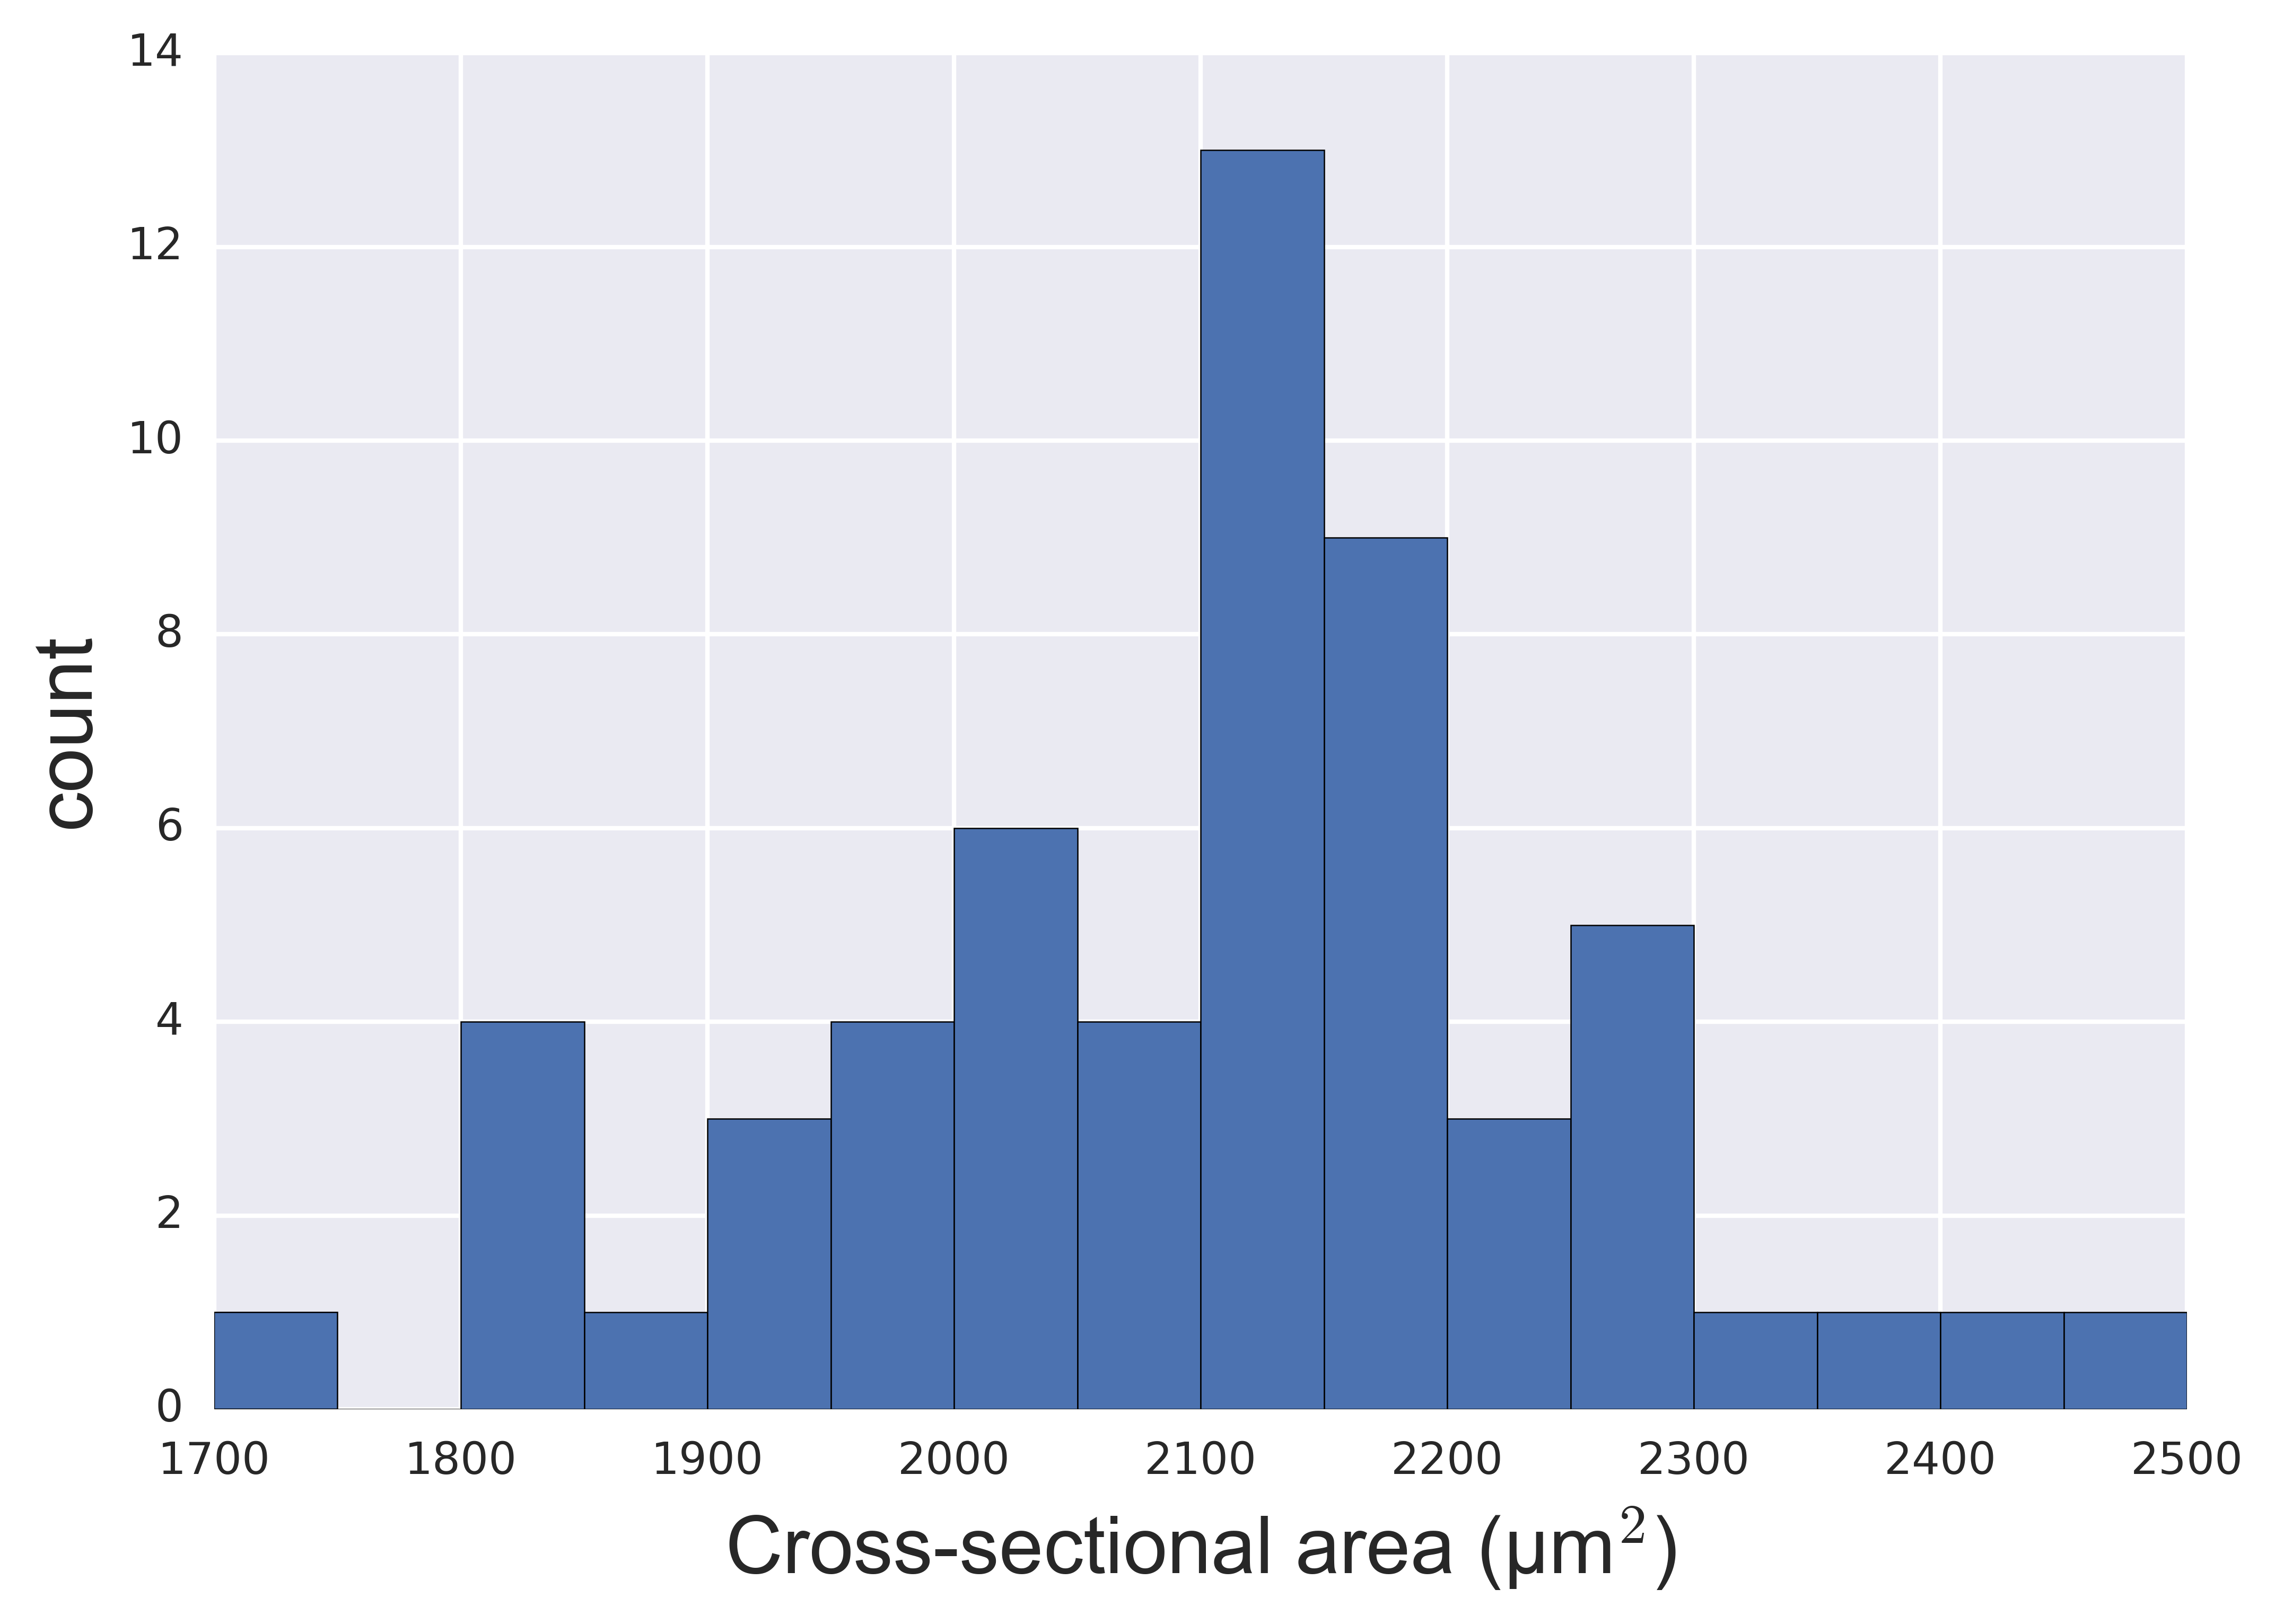

In [16]:
# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, bins=bins)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)', fontsize=18)
plt.ylabel('count', fontsize=18)

That's better!  We can actually avoid retyping that kwarg every time by setting the Seaborn context.  I have my favorite settings, which we can invoke with the `sns.set_context()` function.

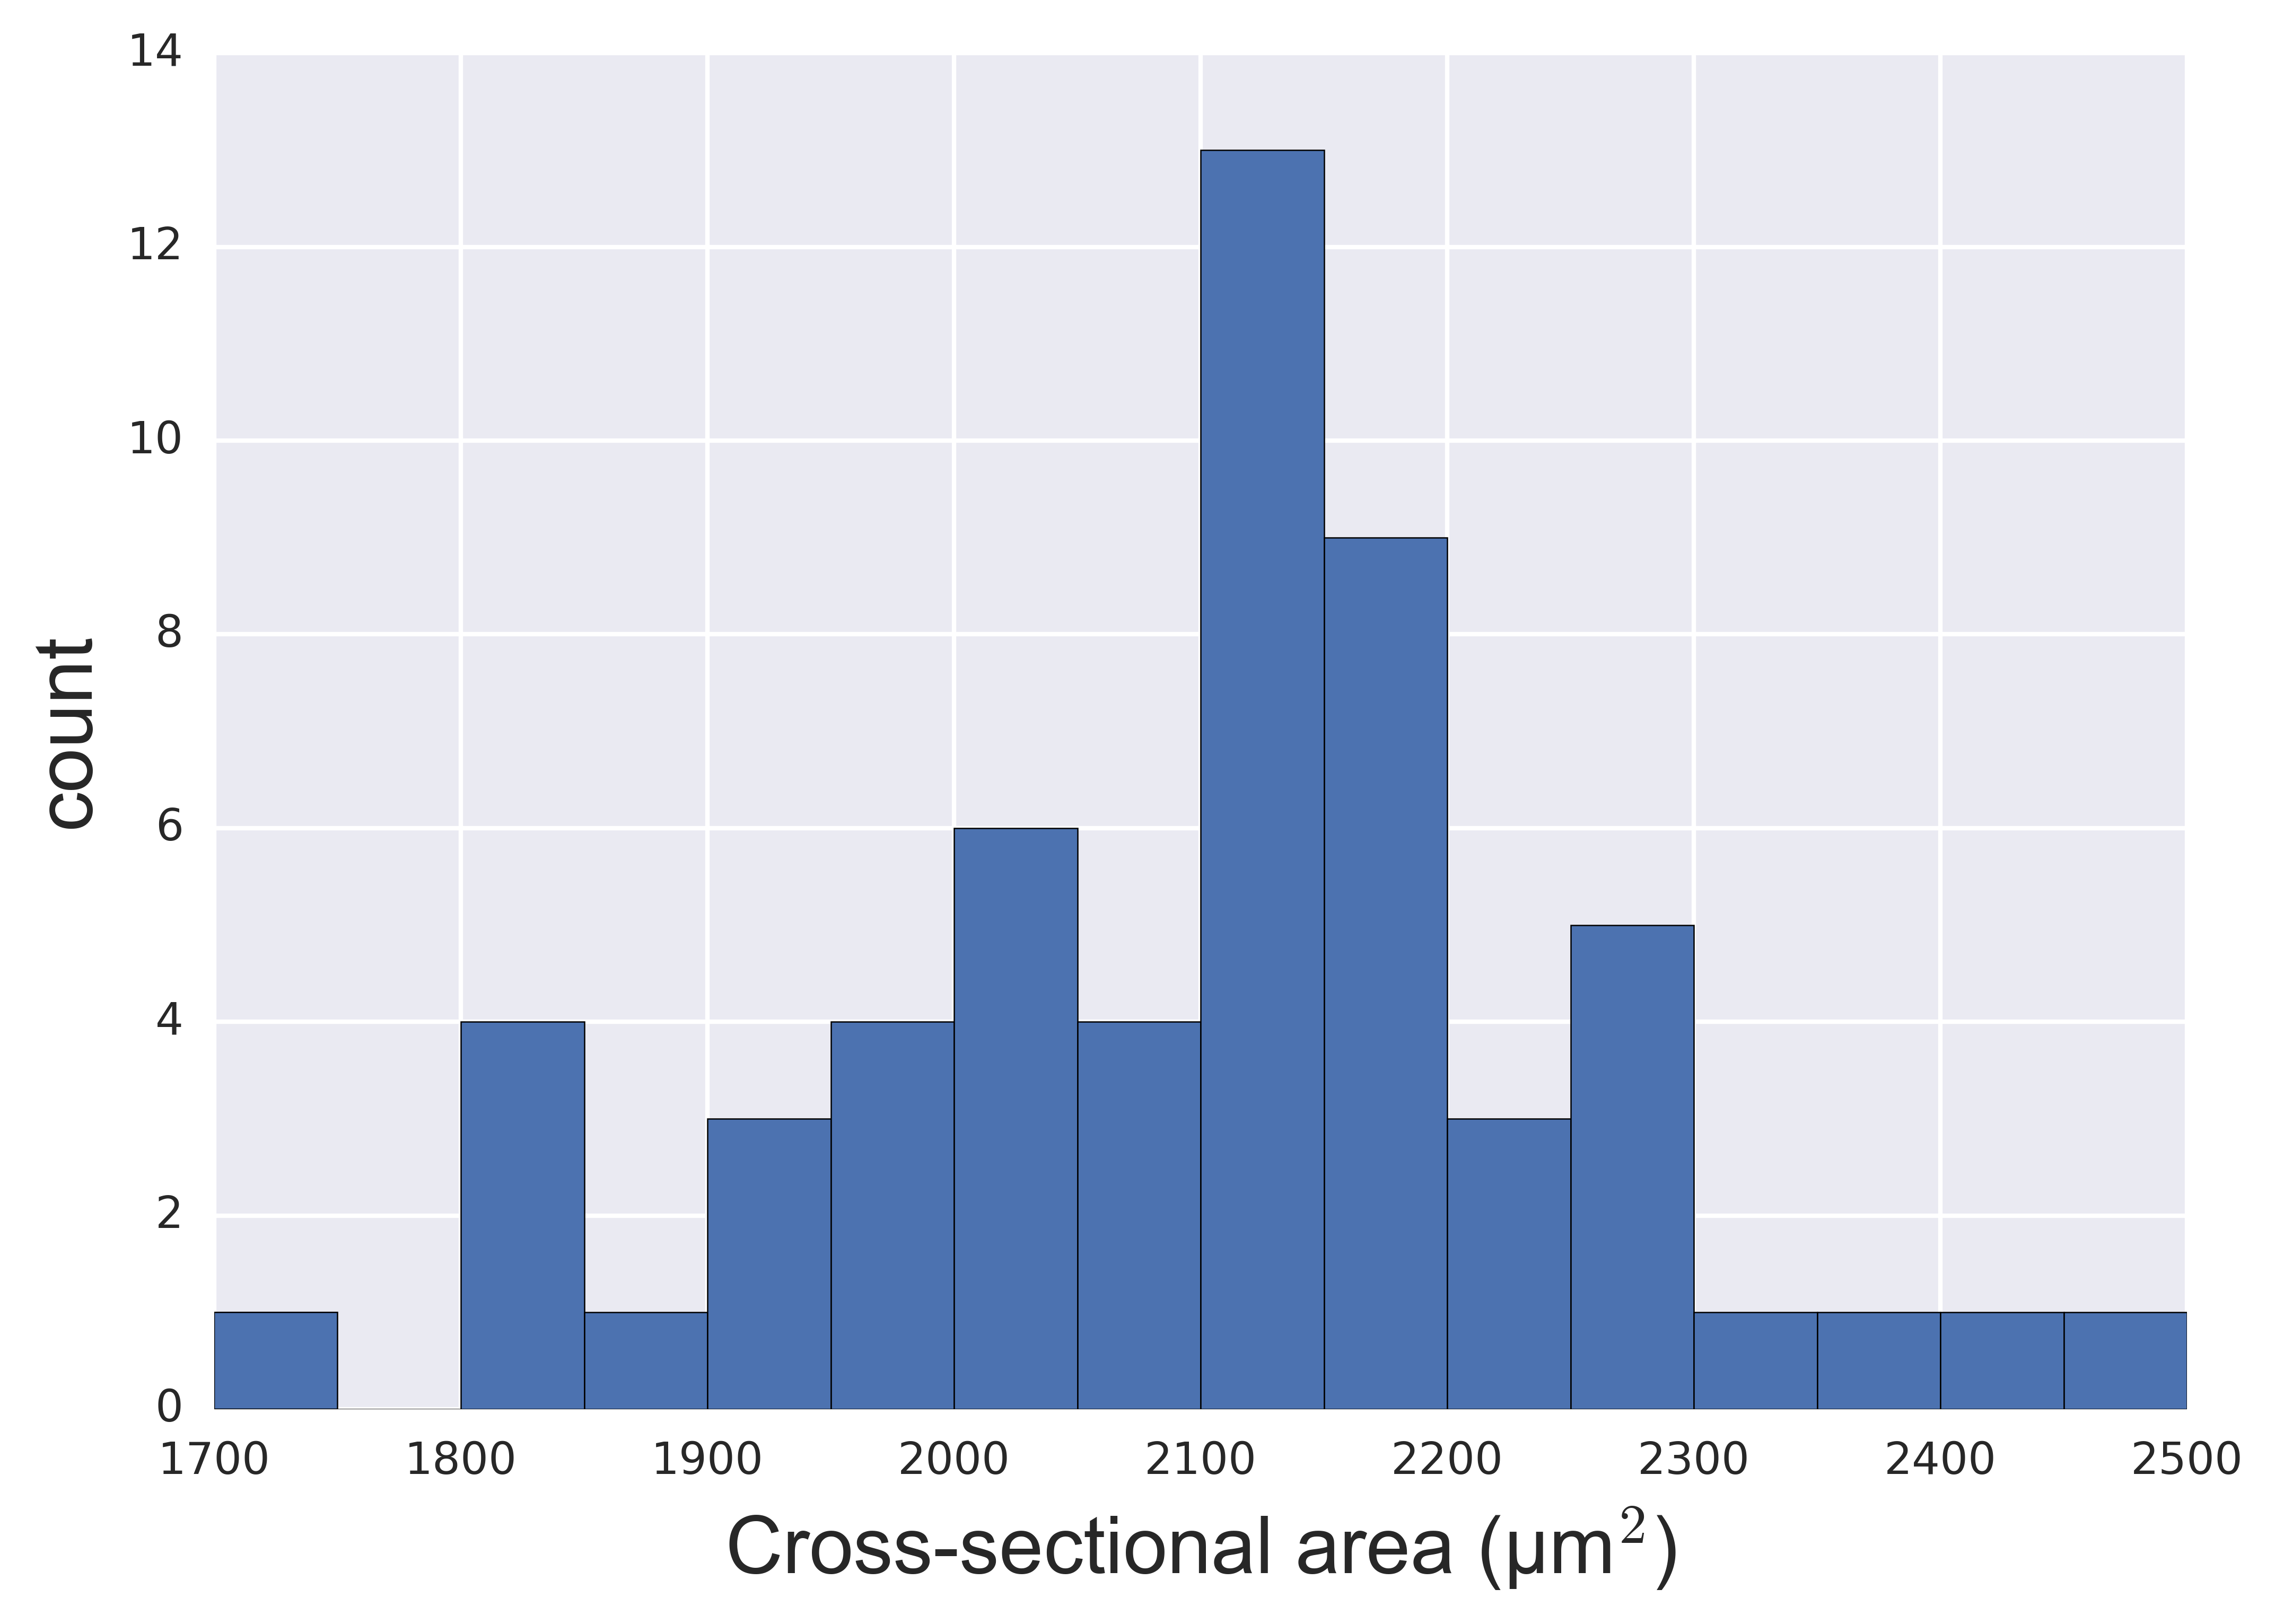

In [25]:
# JB's favorite Seaborn settings for notebooks
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, bins=bins)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('count')

### Plotting the two histograms together

It would be nice to compare the histograms of the to data sets, cross-sectional areas for high food and for low food.  This is done quite intuitively; we simply pass a tuple containing the two Numpy arrays we want made into a paired histogram.

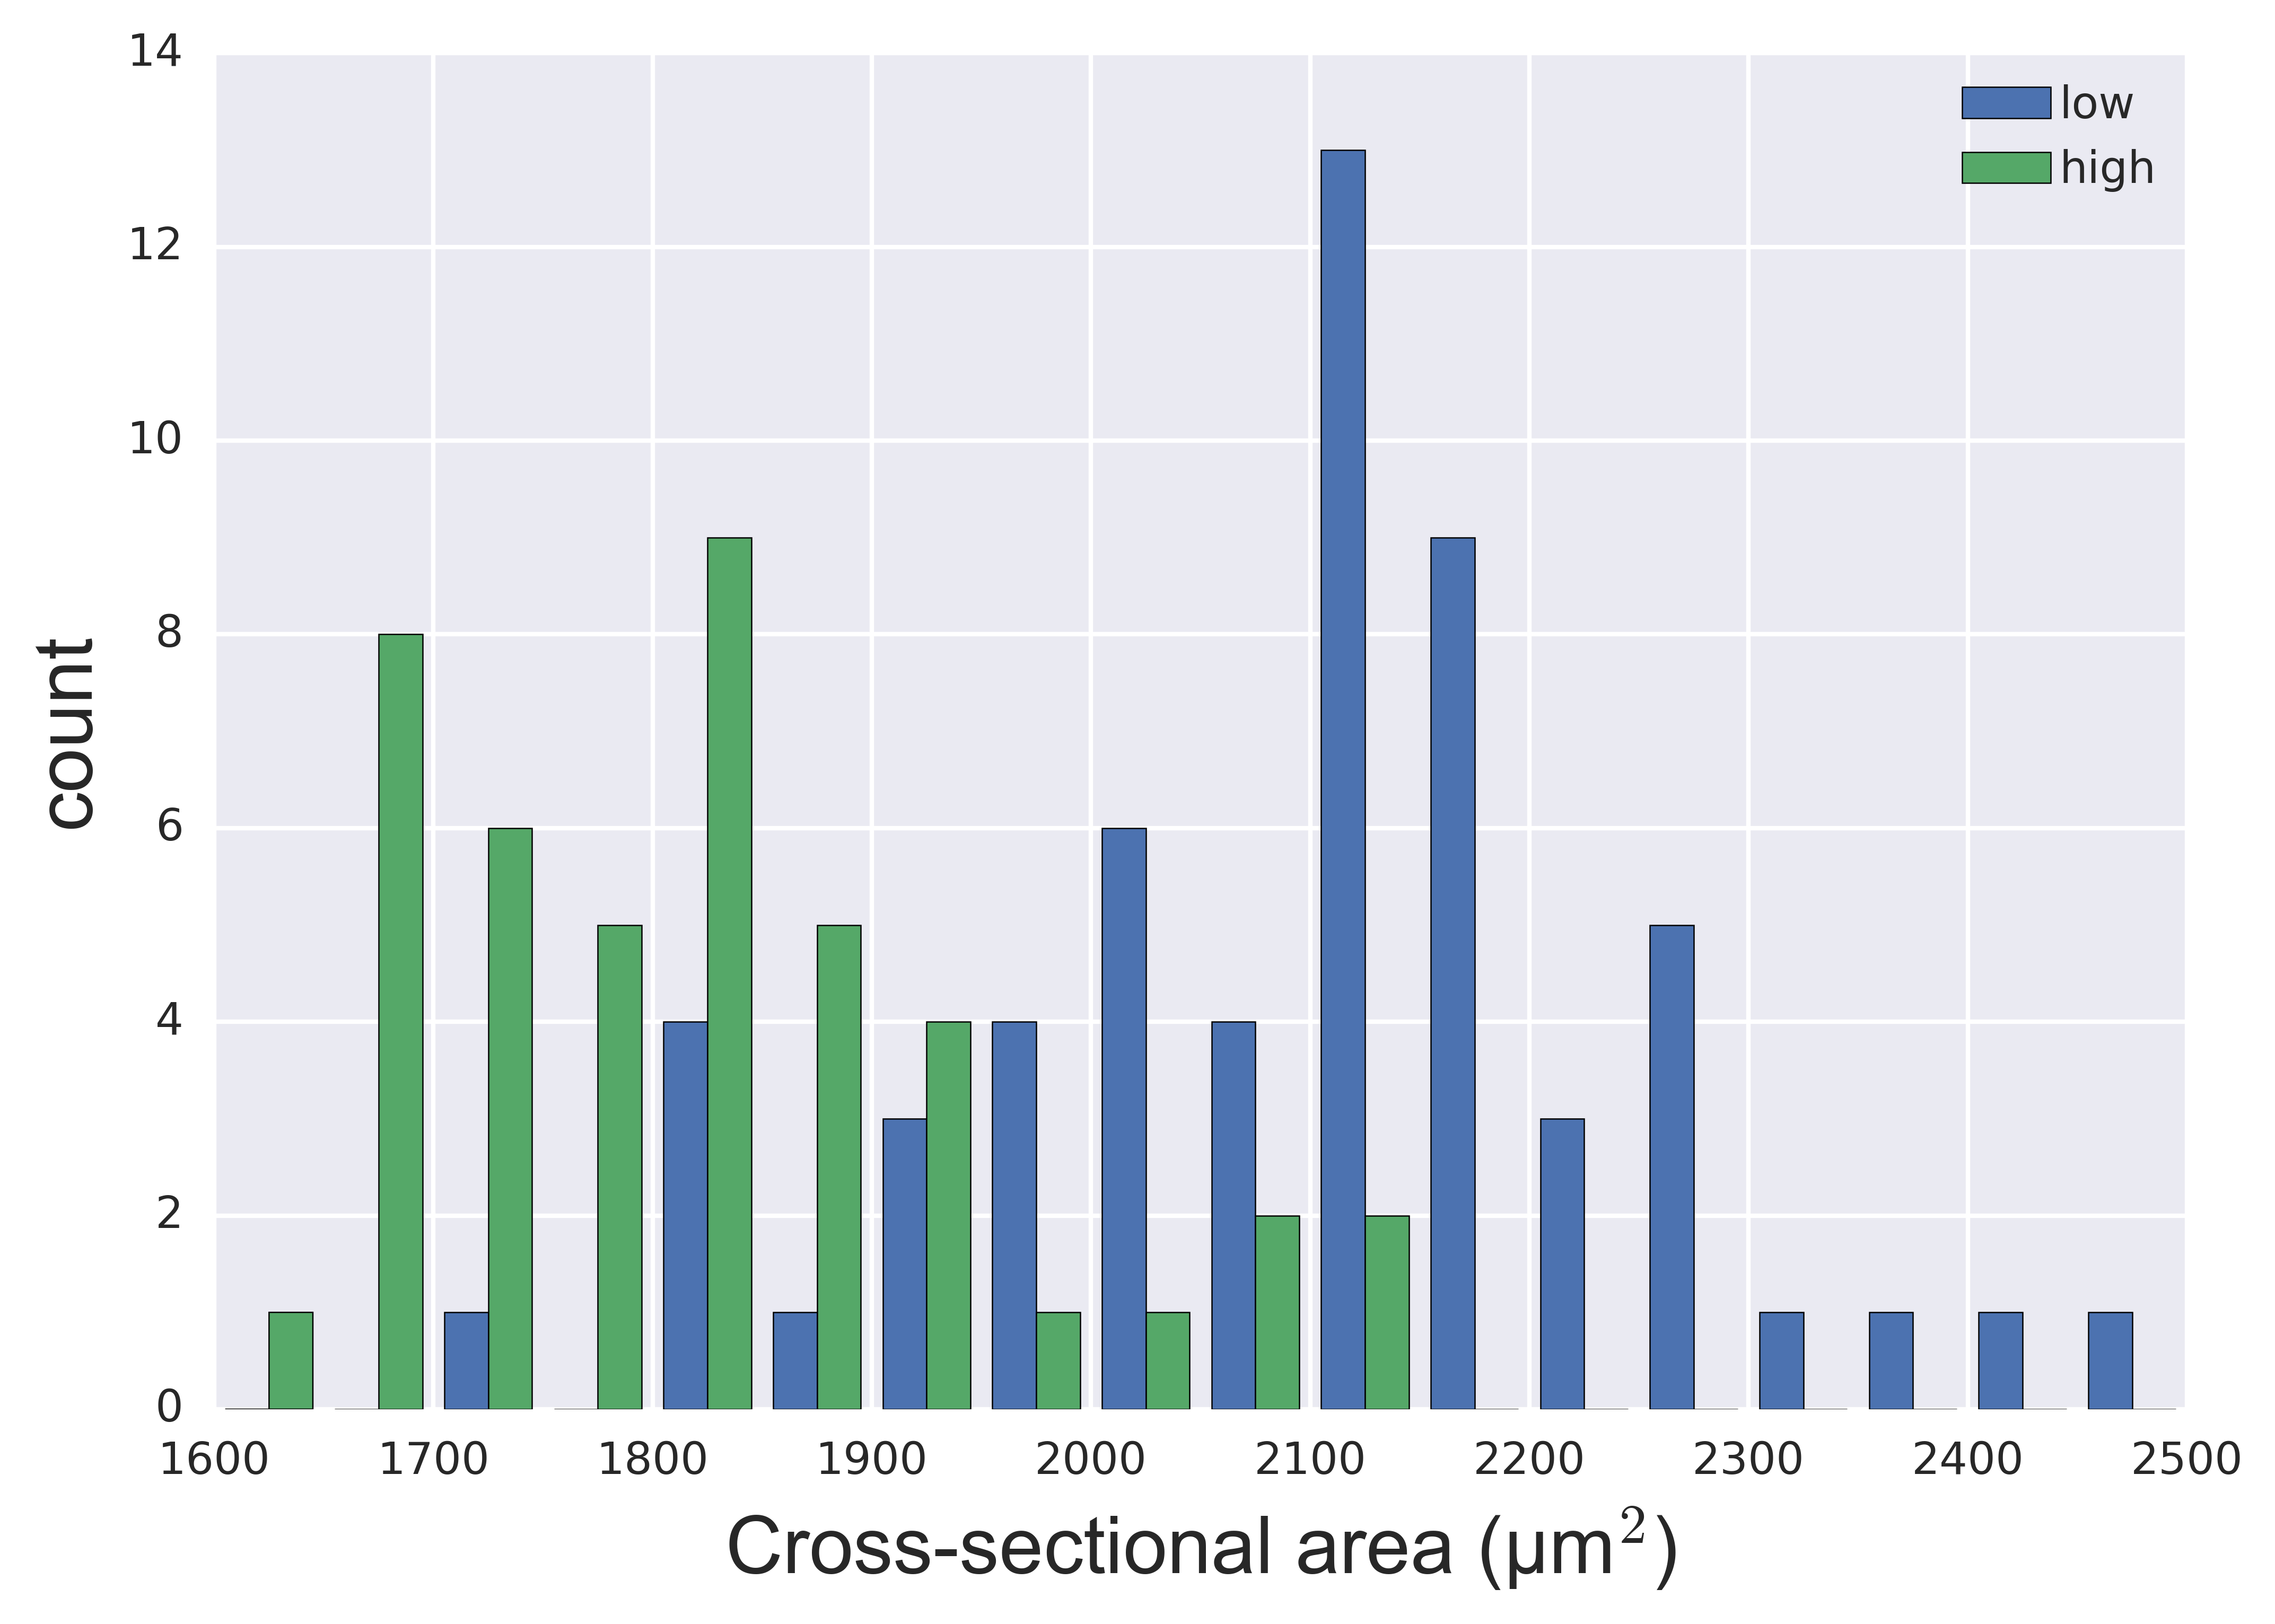

In [28]:
# Reset bins, since xa_low has smaller values
bins = np.arange(1600, 2501, 50)

# Generate the histogram for the low-density fed mother
_ = plt.hist((xa_low, xa_high), bins=bins)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('count')

# Add a legend
plt.legend(('low', 'high'), loc='upper right')

We passed two arrays into `plt.hist()` as a tuple, and it automatically made the two histograms.  Notice that we also added a legend to the upper corner using `plt.legend()`.

I actually think this style of displaying a histogram is hideous.  The bins have now become ambiguous.  Here's how I would do it (not really, though, as we'll see in later exercises).

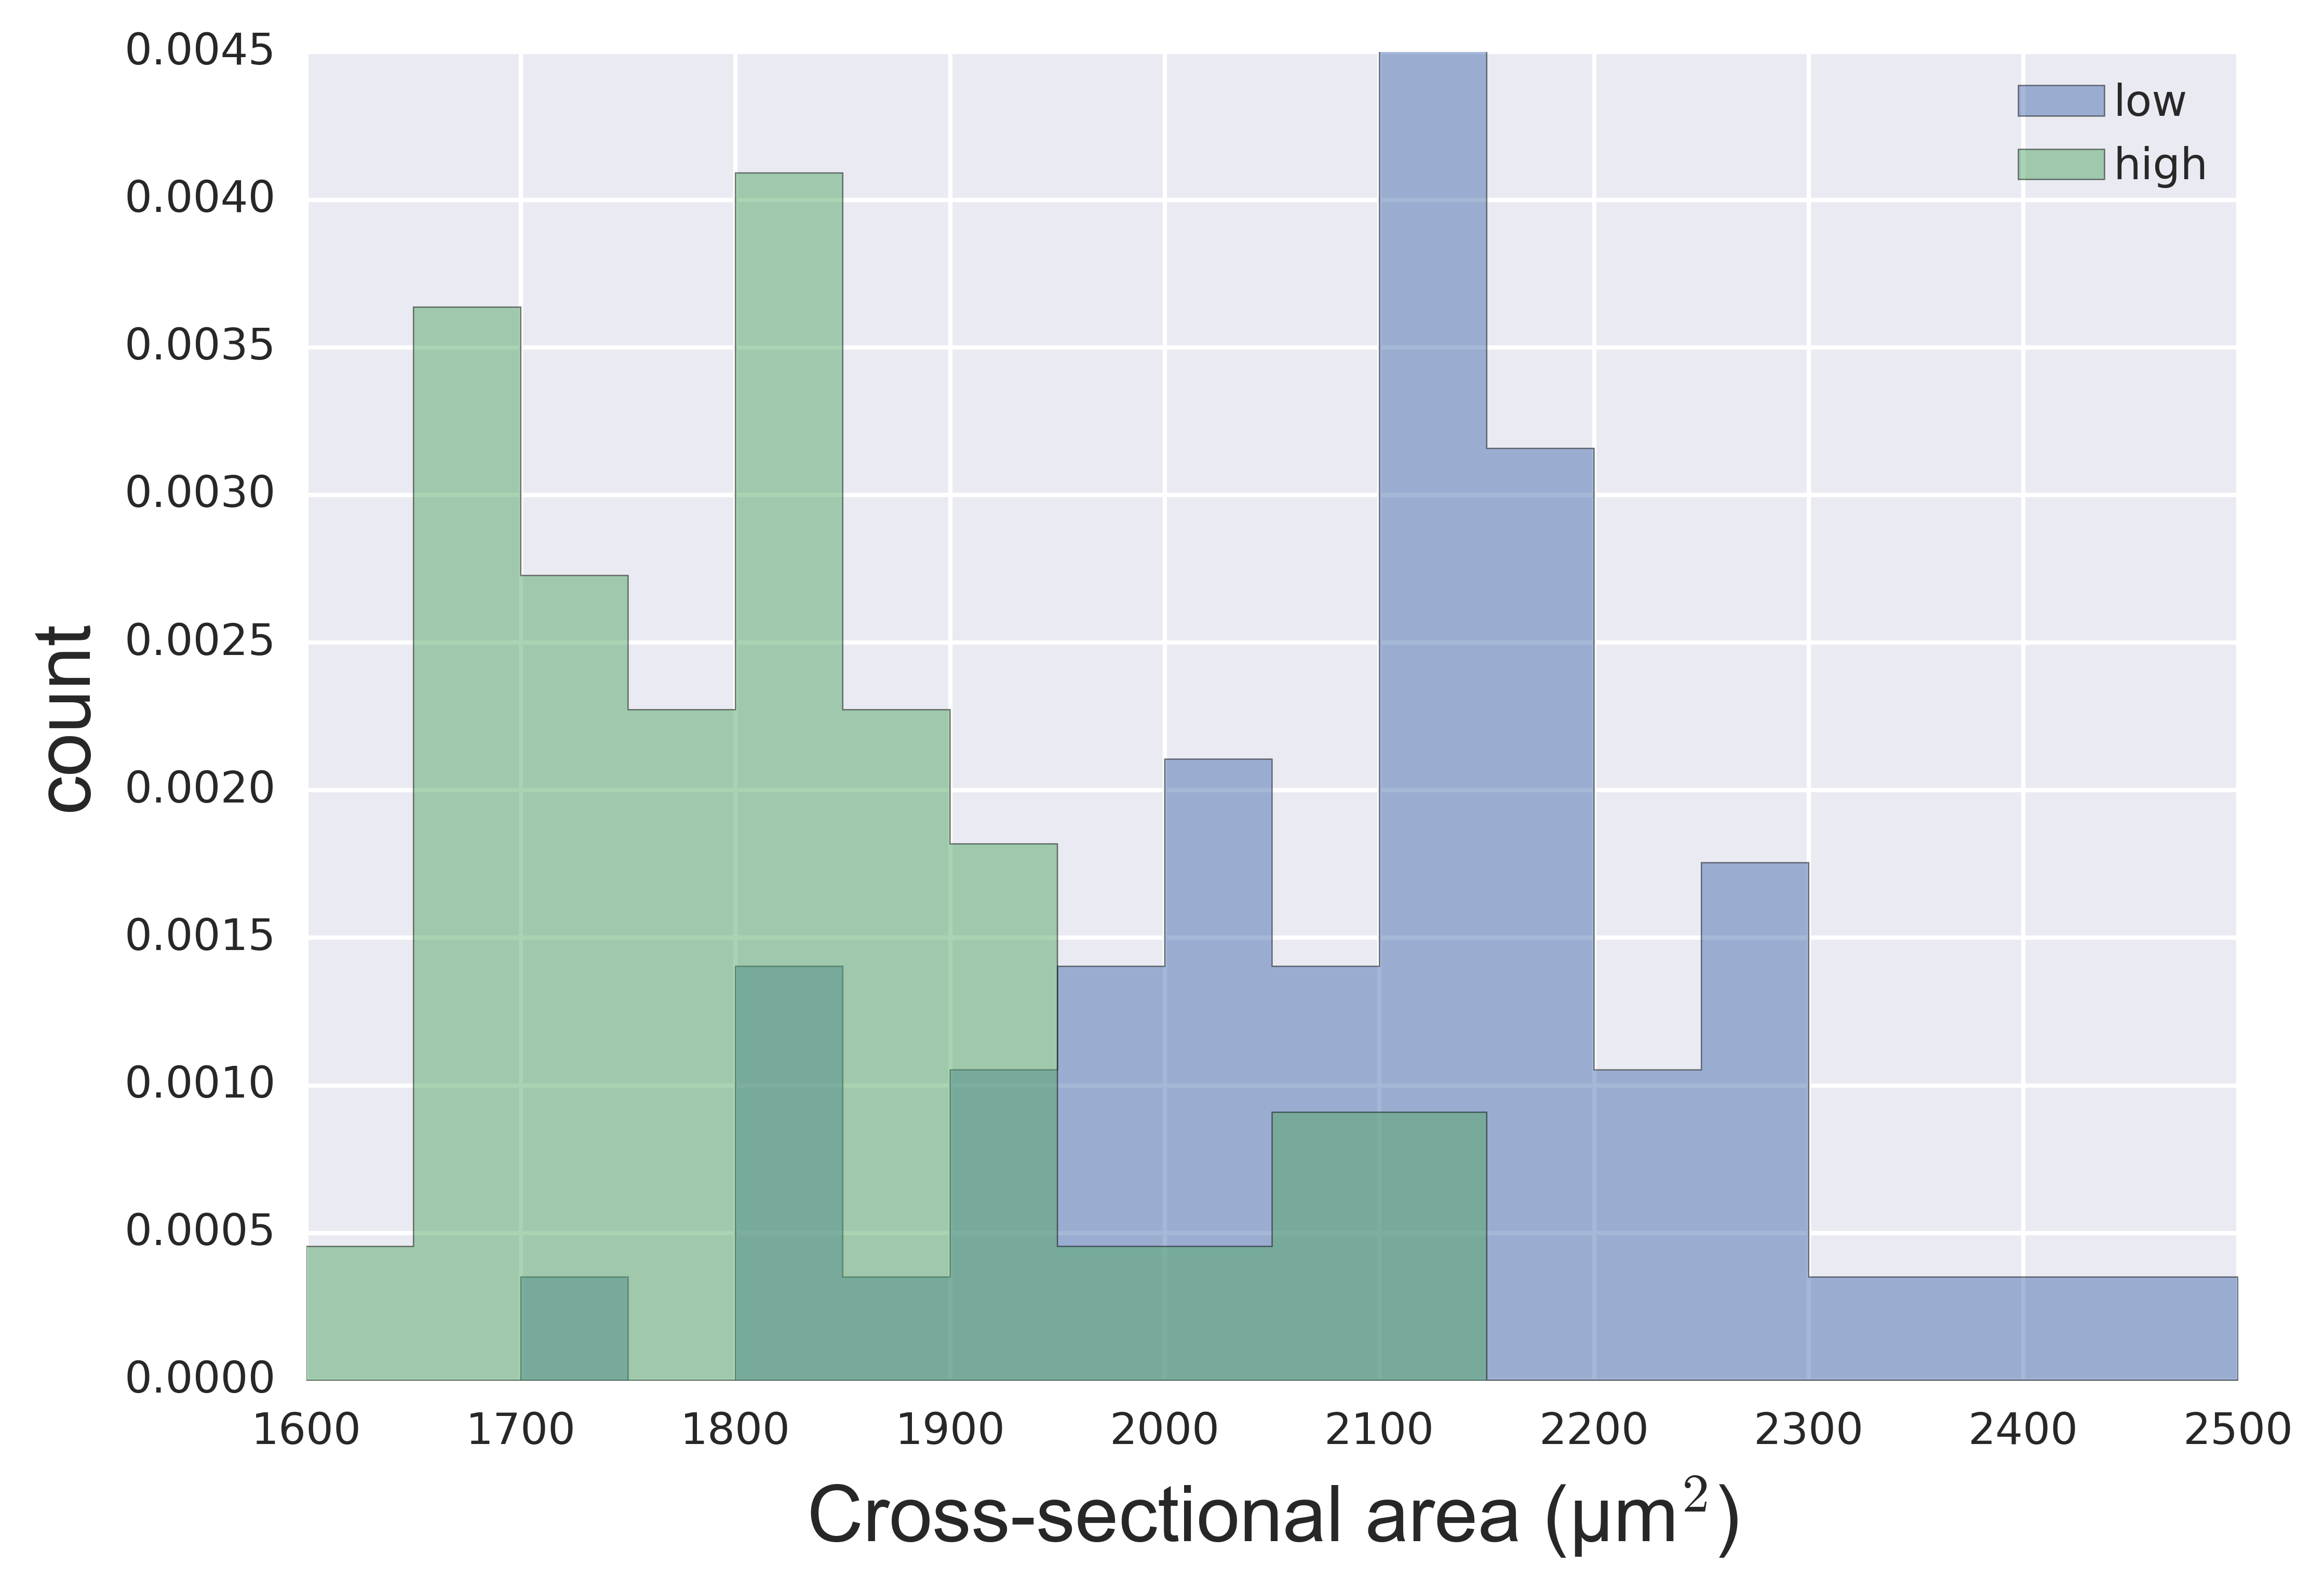

In [27]:
# Reset bins, since xa_low has smaller values
bins = np.arange(1600, 2501, 50)

# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, normed=True, bins=bins, histtype='stepfilled', alpha=0.5)
_ = plt.hist(xa_high, normed=True, bins=bins, histtype='stepfilled', alpha=0.5)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('count')

# Add a legend
plt.legend(('low', 'high'), loc='upper right')

The bin boundaries are again clear.  I used the `histtype` kwarg to indicate that I wanted a "step filled" histogram.  I set the kwarg `alpha` to 0.5, which says I want the fill to only 50% opaque to allow visualization of the overlap of the histogams. I also set `normed=True` to normalize the histogram, since there were an unequal number of eggs for the low and high-fed mothers.

### There are many plotting options!

One of the main aims I had in this example is that there are many many options available for making plots and stylizing them through various functions and kwargs.  The [Matplotlib wesbite](http://matplotlib.org) is chuck full of examples and good documentation.  You should refer to it extensively as you prepare your plots!

## Saving figures

Of course, just displaying your figures is not enough.  You will want to put them in documents!  So, you need to save your figure.  In general, you should save your figures as [**vector graphics**](https://en.wikipedia.org/wiki/Vector_graphics) and not raster graphics.  (There are specific instances where raster graphics are appropriate, but for most applications in science and in presentation of scientific data, vector graphics care better.)

Two common vector graphics formats that Matplotlib can write out are SVG (scalable vector graphics) and PDF (portable document format).  To save a figure in a file named `fig.pdf`, the syntax is as simple as

    plt.savefig('fig.pdf')
    
Similarly to save an SVG, it's simply

    plt.savefig('fig.svg')

### JB's personal view

Actually, my view is that vector graphics are also not ideal, at least not for plotting any substantial amount of data. **Interactive graphics** are much preferred, and we now have the technology to do that. You have interacted with your Matplotlib plots via plotting windows, and for many data sets and/or functions, this is very useful. At the least, you can zoom in on data.

There are packages that allow you to do this, and more, in a web browser. You can also do things like have hover-over information. You may have seen this kind of interactive graphic in places like the New York Times; data journalists have been doing this for years. I think this is the natural extension for scientific plotting. In the future as well, I think the PDF format for scientific papers will die and things will become interactive.

My favorite package for generating this sort of thing is [Bokeh](http://bokeh.pydata.org/en/latest/). If this really excites you, you can play with Bokeh in the exercises tonight.